# The Spark Foundation

# Data Science and Business Analytics Intern

# Name : Sushmitha S

# Task : Prediction Using Unsupervised ML

# Import Modules:

In [17]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans


import warnings as wg
wg.filterwarnings("ignore")


# Importing data and getting basic info:

In [18]:
df = pd.read_csv("Iris.csv")

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
# Remove Unnecessary Columns
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df.shape

(150, 5)

In [24]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset:

In [41]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Label Encoder:

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['Species']= le.fit_transform(df['Species'])
df.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Finding the Optimum No.of Clusters:

In [33]:
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    within_cluster_sum_of_square.append(km.inertia_)

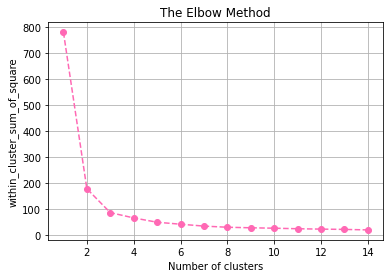

In [34]:
plt.plot(clusters_range,within_cluster_sum_of_square, 'go--' , color = 'hotpink')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_square')

plt.grid()
plt.show()

# Applying k means clustering on the data:

In [37]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300,n_init = 10, random_state = 0)
predictions = model.fit_predict(df)

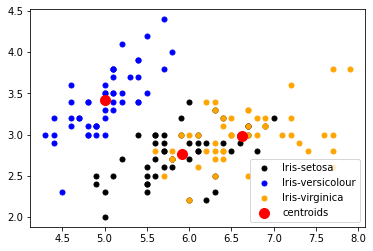

In [40]:
x = df.iloc[:, [0,1,2,3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0,1], s =25, c= 'black', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1,1], s =25, c= 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2,1], s =25, c= 'orange', label = 'Iris-virginica')

#plotting the clusters centres
plt.scatter(model.cluster_centers_[: , 0], model.cluster_centers_[:, 1], s = 100, c= 'red', label ='centroids')
plt.legend()
plt.show()